# Wine Data Clustering Project

In this project, we use the K-Means clustering algorithm to segment wines based on their chemical constituents. The dataset consists of various chemical properties of wines derived from three different cultivars. Our goal is to identify distinct wine segments with similar chemical properties and find the optimal number of clusters.

From the dataset (https://archive.ics.uci.edu/dataset/109/wine)

## Step 1: Import Libraries

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

## Step 2: Load the Data

In [225]:
data = pd.read_csv('wine.csv')
data = data.drop(columns=['Customer_Segment'])

We load the wine dataset, which contains chemical analysis results of wines from three different cultivars. The dataset includes 13 chemical properties. We then drop the Customer_Segment column as it represents the known class labels, which are not used in unsupervised learning.

## Step 3: Data Analysis

### Boxplot for Each Attribute (Excluding Magnesium and Proline)

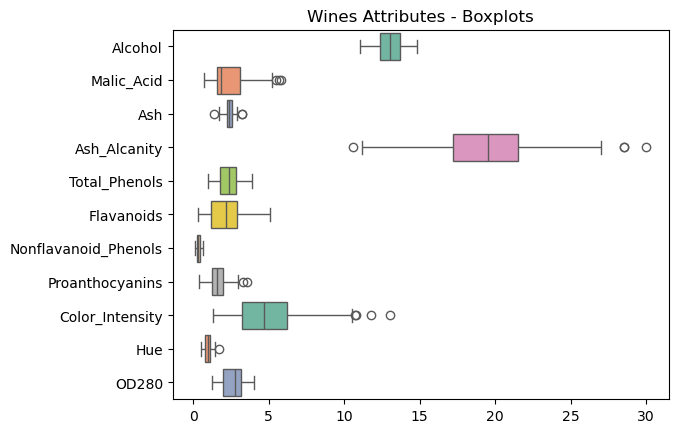

In [230]:
columns_to_plot = [col for col in data.columns if col not in ['Magnesium', 'Proline']]
sns.boxplot(data=data[columns_to_plot], orient="h", palette="Set2")
plt.title('Wines Attributes - Boxplots')
plt.show()

Boxplots are used to visualize the spread and central tendency of each attribute. We exclude Magnesium and Proline due to their high values, which can distort the visualization.

### Correlation Matrix

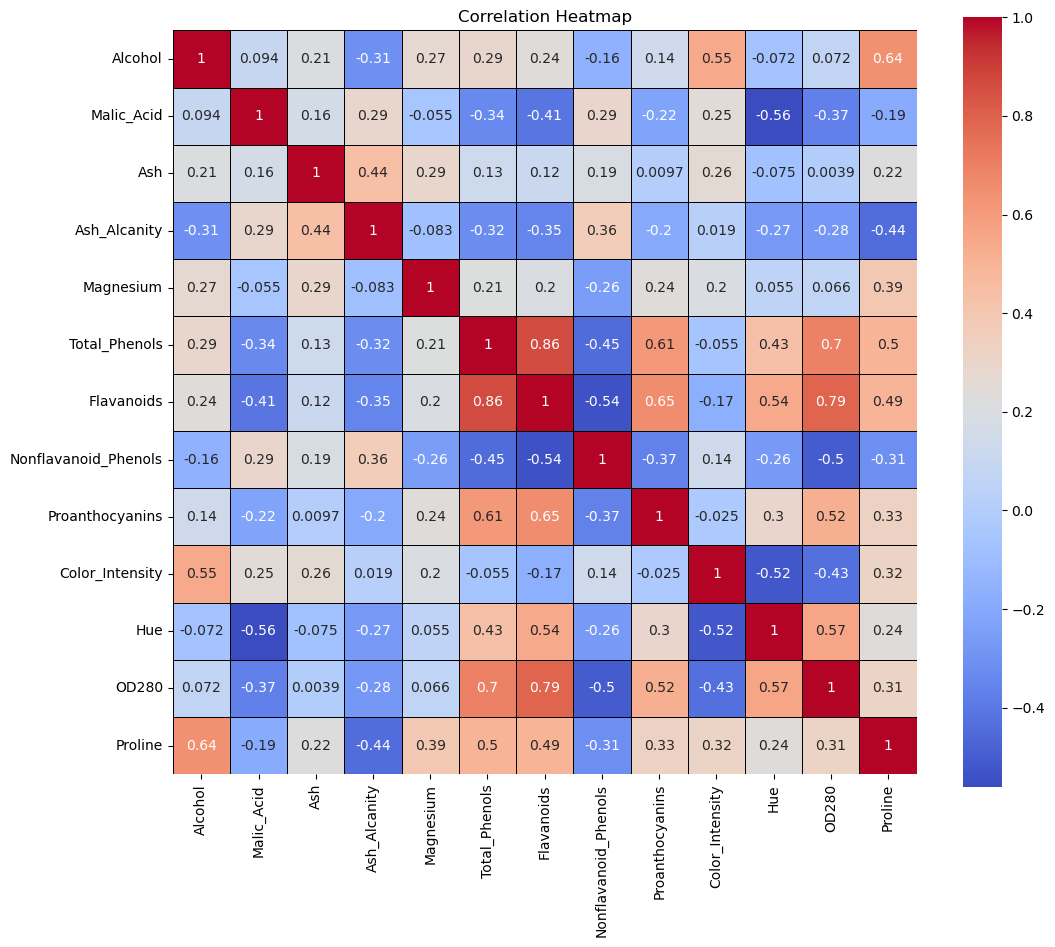

In [234]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows the pairwise correlation between attributes. This helps in identifying relationships between chemical properties, such as a strong correlation between Total_Phenols and Flavanoids.

### Relationship between Total_Phenols and Flavanoids

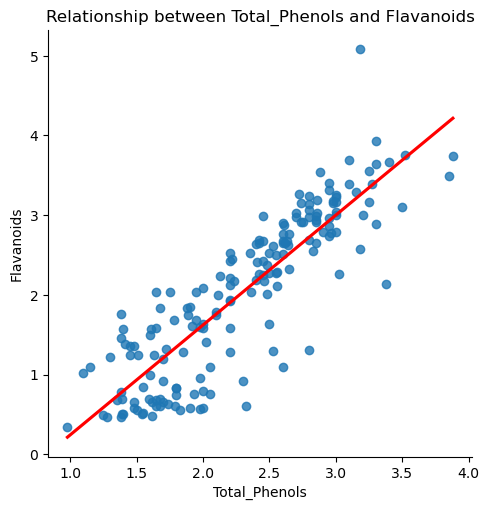

In [238]:
sns.lmplot(x='Total_Phenols', y='Flavanoids', data=data, line_kws={'color': 'red'}, ci=None)
plt.title('Relationship between Total_Phenols and Flavanoids')
plt.show()

Plotting the relationship between Total_Phenols and Flavanoids using a scatter plot with a linear regression line helps in visualizing the strong positive correlation between these two attributes.

## Step 4: Data Preparation

### Normalization

In [243]:
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

Normalization adjusts the values measured on different scales to a common scale. This is important for clustering algorithms like K-Means, which are sensitive to the scale of the data.

### Original Data vs. Normalized Data

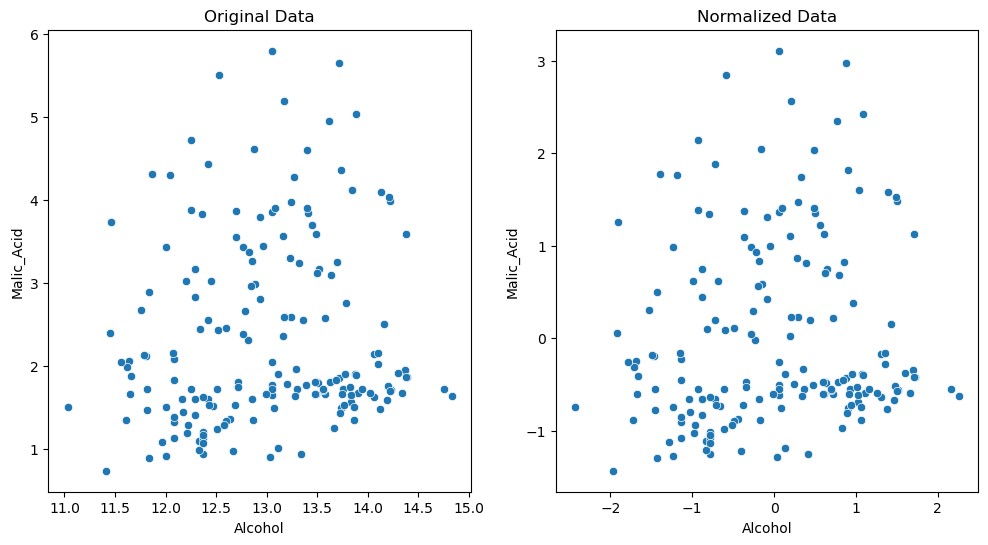

In [247]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=data, x='Alcohol', y='Malic_Acid', ax=ax1)
ax1.set_title('Original Data')
sns.scatterplot(data=data_normalized, x='Alcohol', y='Malic_Acid', ax=ax2)
ax2.set_title('Normalized Data')
plt.show()

We compare the original data with the normalized data using scatter plots. This helps in understanding how normalization affects the scale of the attributes.

### Step 5: K-Means Execution

### Execution of K-Means with k=2

In [252]:
kmeans_k2 = KMeans(n_clusters=2, random_state=1234)
kmeans_k2.fit(data_normalized)
data['Cluster_k2'] = kmeans_k2.labels_

We apply K-Means clustering with 2 clusters to the normalized data and assign the cluster labels to the DataFrame. This initial clustering provides a baseline for further analysis.
View Cluster Centers and Sizes

In [255]:
print("Cluster Centers for k=2:\n", kmeans_k2.cluster_centers_)
print("Cluster Sizes for k=2:\n", np.bincount(kmeans_k2.labels_))

Cluster Centers for k=2:
 [[ 0.3731984  -0.33591045  0.10672657 -0.50717878  0.36921172  0.81815357
   0.85494159 -0.61447777  0.65879394 -0.07688185  0.52931399  0.72401864
   0.65774832]
 [-0.33349644  0.30017529 -0.09537268  0.45322359 -0.32993388 -0.73111596
  -0.76399035  0.5491078  -0.58870948  0.06870293 -0.47300399 -0.64699538
  -0.5877751 ]]
Cluster Sizes for k=2:
 [84 94]


We print the cluster centers and sizes for the K-Means model with 2 clusters. This provides insight into the characteristics of each cluster.

### Inertia Calculation for Different k

In [259]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

We calculate the inertia (within-cluster sum of squares) for different values of k (1 to 10). This helps in determining the optimal number of clusters using the Elbow Method.

### Plot Inertia vs. Number of Clusters

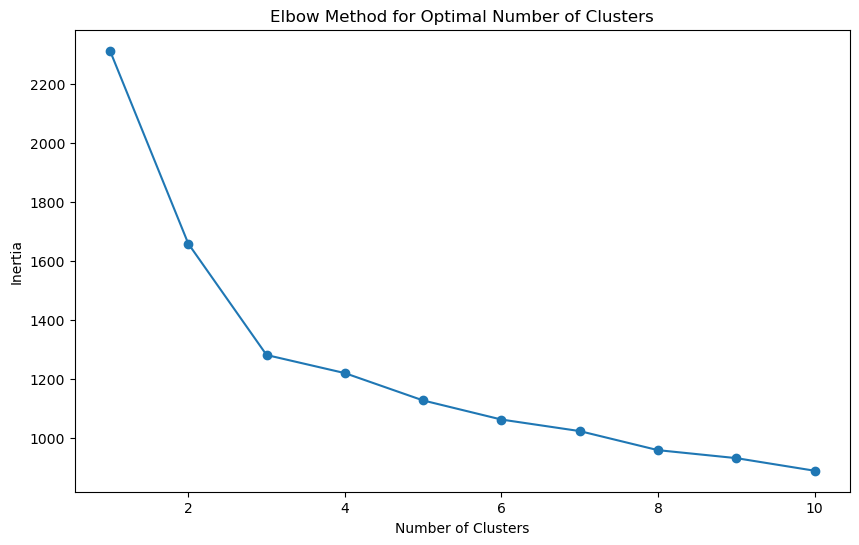

In [263]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

We plot the inertia against the number of clusters to visualize the Elbow Method. The optimal number of clusters is identified at the "elbow point," where the rate of decrease in inertia slows down.

### Optimal k based on Elbow Method

In [267]:
optimal_k = 3
kmeans_k3 = KMeans(n_clusters=optimal_k, random_state=1234)
kmeans_k3.fit(data_normalized)
data['Cluster_k3'] = kmeans_k3.labels_

Based on the Elbow Method, we determine the optimal number of clusters to be 3. We apply K-Means clustering with 3 clusters and assign the cluster labels to the DataFrame.

### Mean Values of Each Cluster for k=3

In [271]:
cluster_means = data.groupby('Cluster_k3').mean()
print("Mean Values of Each Cluster for k=3:\n", cluster_means)

Mean Values of Each Cluster for k=3:
               Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster_k3                                                              
0           13.592388    1.936119  2.442985     17.594030  108.298507   
1           12.241774    1.972097  2.230000     20.012903   91.064516   
2           13.151633    3.344490  2.434694     21.438776   99.020408   

            Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster_k3                                                                     
0                2.838060    2.956418              0.286269         1.938806   
1                2.195968    2.000484              0.373226         1.553065   
2                1.678163    0.797959              0.450816         1.163061   

            Color_Intensity       Hue     OD280      Proline  Cluster_k2  
Cluster_k3                                                                
0                  5.305373  1.071493  3.1428

We calculate the mean values of each cluster to understand the characteristics of the clusters. This provides insight into how the clusters differ from each other based on their chemical properties.

### Visualize the Clustering Results

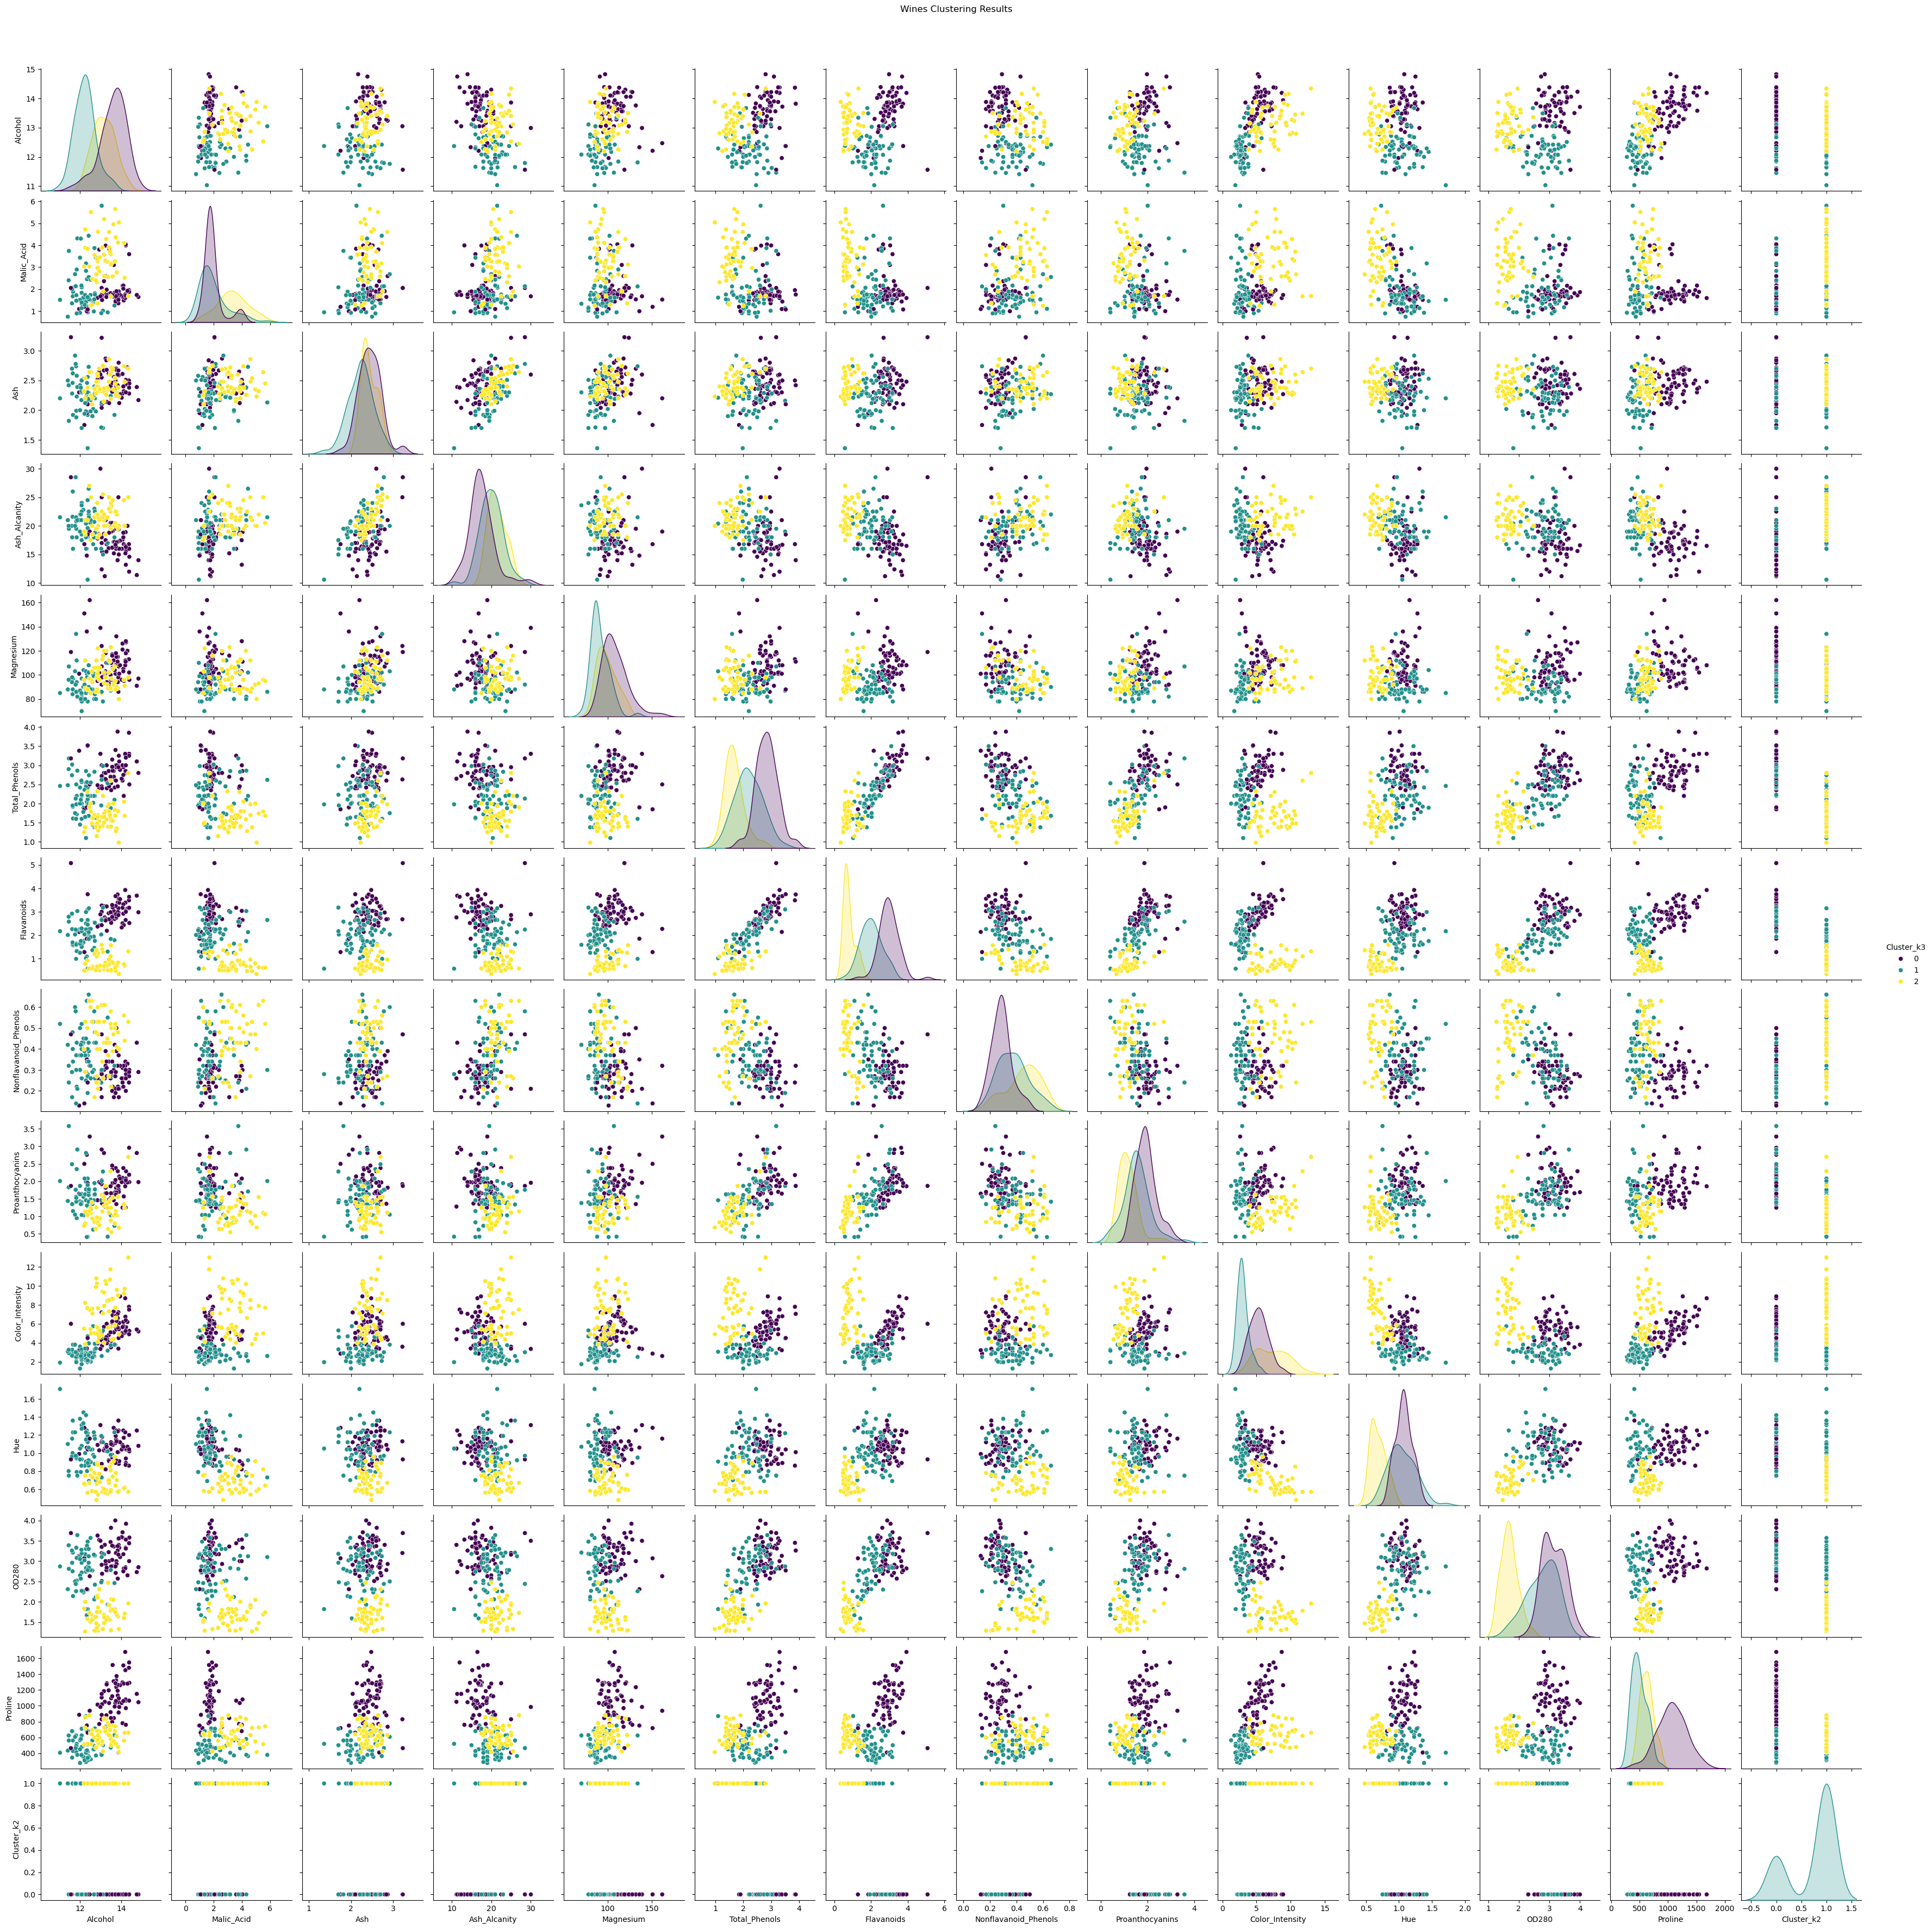

In [275]:
sns.pairplot(data, hue='Cluster_k3', palette='viridis', diag_kind='kde')
plt.suptitle('Wines Clustering Results', y=1.02)
plt.show()

We use pair plots to visualize the clustering results for all attributes. This helps in understanding how the clusters are distributed across different attributes.

## Step 6: Enhancements

### Principal Component Analysis (PCA)

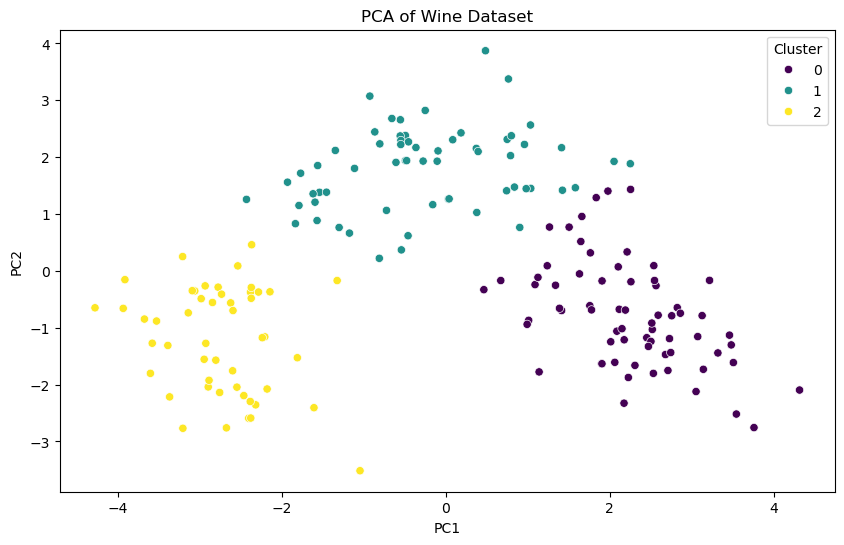

In [279]:
# Perform PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_normalized)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster_k3']

# Plot PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('PCA of Wine Dataset')
plt.show()

PCA reduces the dimensionality of the dataset while preserving as much variance as possible. This helps in visualizing the clusters in a 2D space, making it easier to see how the clusters are distributed.

### Hierarchical Clustering

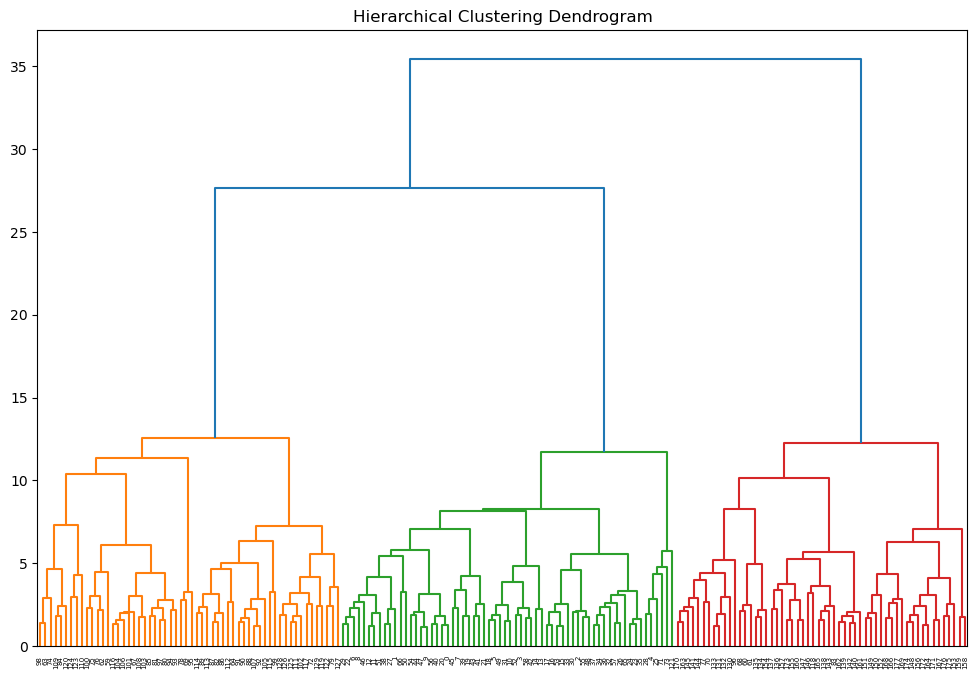

In [282]:
# Generate linkage matrix
linked = linkage(data_normalized, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Hierarchical clustering creates a tree-like structure (dendrogram) that visualizes the nested clusters in the dataset. This helps in understanding the hierarchical relationships between data points and comparing them with the K-Means clusters.

### Visualizing Clusters in 3D using PCA

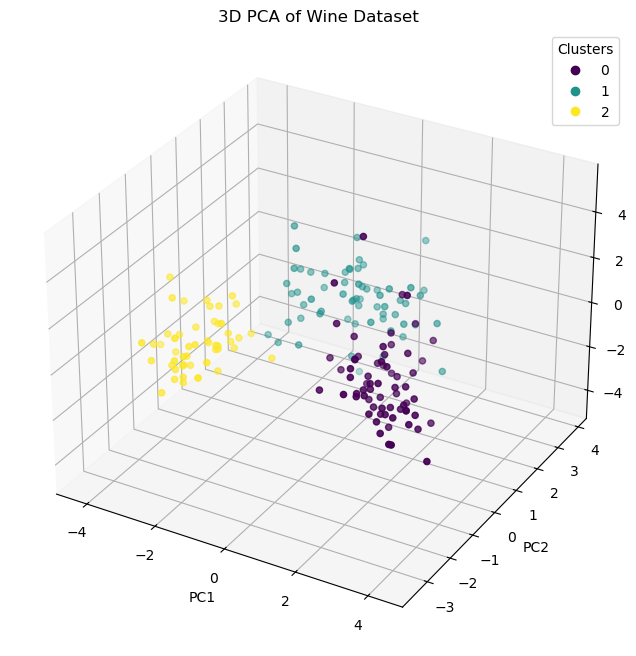

In [285]:
# Perform PCA for 3 components
pca_3d = PCA(n_components=3)
pca_components_3d = pca_3d.fit_transform(data_normalized)

# Create a DataFrame with PCA components
pca_df_3d = pd.DataFrame(data=pca_components_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Cluster'] = data['Cluster_k3']

# Plot PCA components in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['Cluster'], cmap='viridis')
ax.set_title('3D PCA of Wine Dataset')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

Visualizing the clusters in 3D space using PCA provides a more comprehensive view of how the clusters are distributed. This helps in understanding the separation and overlap between clusters.

## Step 7: Evaluation

In [288]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_normalized, kmeans_k3.labels_)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg:.4f}')

Silhouette Score for k=3: 0.2807


The silhouette score measures how well-separated the clusters are. A higher silhouette score indicates better-defined clusters. This metric helps in evaluating the quality of the clustering.

## Summary and Conclusion
### Summary of the analysis and K-Means clustering results

In [180]:
print(f'In this notebook, we performed K-Means clustering on the wine dataset.\nWe explored and visualized the data, normalized the features, and used Grid Search with inertia to find the optimal number of clusters.\nThe optimal number of clusters was found to be {optimal_k} based on the Elbow Method.\nThe silhouette score for the clustering was {silhouette_avg:.4f}, indicating moderately well-defined clusters.')

In this notebook, we performed K-Means clustering on the wine dataset.
We explored and visualized the data, normalized the features, and used Grid Search with inertia to find the optimal number of clusters.
The optimal number of clusters was found to be 3 based on the Elbow Method.
The silhouette score for the clustering was 0.2807, indicating moderately well-defined clusters.


We summarize the steps taken in the analysis, including data exploration, normalization, K-Means clustering, and enhancements such as PCA and hierarchical clustering. We conclude that the optimal number of clusters is 3, as identified using the Elbow Method and supported by the silhouette score.

### Conclusion

By identifying the optimal number of clusters as 3, we have successfully segmented the wine dataset based on chemical properties. This segmentation can help in understanding the different types of wines and their characteristics. The clusters provide insights into how the wines can be grouped, which can be useful for targeted marketing, quality control, and further analysis of wine attributes.